In [1]:
import torch
import numpy as np
import random

# Set the seed for reproducibility
seed = 21
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# If you are using CUDA, set the seed for all GPUs
torch.cuda.manual_seed_all(seed)

In [2]:
##################################Inter the Parameters###############################################################

# Hypervector Dimension
hv_d = 1000

# Number of Epochs
n_epochs = 4

import numpy as np
#Basis Sigma
sigma_basis_vector = np.linspace(0.01, 1.2, num=50)

#Noise Epsilon
eps  = 0.8

In [3]:
import sklearn
import time
from scipy import stats
import torchhd
import torch
import sys
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math
import numpy as np
import copy
import random
import joblib
from tqdm import tqdm
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from torch import nn
from torch.optim import Adam
from tqdm import tqdm_notebook
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.misc
from PIL import Image
import skimage
from skimage import data
from skimage.color import rgb2gray

In [4]:
#################################  Dataset  #####################################################

highspeed_data = np.squeeze(np.load('highspeed_data.npy'))
highspeed_label = np.squeeze(np.load('highspeed_label.npy'))

In [5]:
def get_data(highspeed_data, highspeed_label):
########################  Data #################################################


    traindata, testdata, trainlabels, testlabels = train_test_split(highspeed_data, highspeed_label,
                                                                    test_size=0.3, random_state=42,stratify=highspeed_label)
        
    shuf_train = np.random.permutation(len(traindata))
    traindata = traindata[shuf_train]
    trainlabels = trainlabels[shuf_train]

    shuf_test = np.random.permutation(len(testdata))
    testdata = testdata[shuf_test]
    testlabels = testlabels[shuf_test]
    
    
    traindata = torch.from_numpy(traindata).cuda()
    testdata = torch.from_numpy(testdata).cuda()

    trainlabels = torch.from_numpy(trainlabels).cuda()
    testlabels = torch.from_numpy(testlabels).cuda()
    
    return traindata, testdata, trainlabels, testlabels 


In [6]:
def pert_noise(class_hvs,epsilon_noise,delta_f):
    delta = 10 ** -4
    sigma_noise = np.sqrt(2*np.log(1.25/delta))/epsilon_noise
    class_noisy = torch.zeros(class_hvs.shape, dtype=torch.float64).cuda()
    for i_class in range(len(class_hvs)):
        class_noisy[i_class] = class_hvs[i_class] + torch.normal(mean=0, std = delta_f * sigma_noise, size=(hv_d,)).cuda()

    return class_noisy

In [7]:


traindata, testdata, trainlabels, testlabels   = get_data(highspeed_data, highspeed_label)
nClasses = len(torch.unique(trainlabels))
nFeatures = traindata.shape[1]
len_train = len(traindata)
acc = []
for sigma_basis in sigma_basis_vector:
    print('sigma_basis: ',sigma_basis)
    basis = torch.zeros((nFeatures,hv_d), dtype=torch.float64).cuda()
    for i_bas in range(hv_d):
        basis[:,i_bas] = torch.normal(mean=0, std=sigma_basis, size=(nFeatures,)).cuda()

    bias_vect = torch.rand(hv_d, device='cuda') * 2 * torch.pi

    trainencoded  = (torch.cos(torch.matmul(traindata, basis)+bias_vect)).cuda()
            
    testencoded  = (torch.cos(torch.matmul(testdata, basis)+bias_vect)).cuda()
    
    delta_f = trainencoded.norm(p=2, dim=1).max().cuda()

    class_hvs = torch.zeros((nClasses,hv_d), dtype=torch.float64).cuda()
    for i_sub in range(len_train):
        class_hvs[trainlabels[i_sub]] += trainencoded[i_sub]


    for i_epoch in range(n_epochs):
        len_train_sh = list(range(len_train))
        random.shuffle(len_train_sh)
        for i_sub in len_train_sh:
            guess = torch.matmul(class_hvs,trainencoded[i_sub]).argmax()
            if guess!= trainlabels[i_sub]:
                class_hvs[trainlabels[i_sub]] = class_hvs[trainlabels[i_sub]] + trainencoded[i_sub]
                class_hvs[guess] = class_hvs[guess] - trainencoded[i_sub]

    class_noisy = pert_noise(class_hvs,eps,delta_f)
    predict = torch.matmul(testencoded,class_noisy.T).argmax(axis=1)
    test_acc = torch.sum(predict == testlabels).item() / len(testlabels)

    acc.append(test_acc)

sigma_basis:  0.01
sigma_basis:  0.03428571428571429
sigma_basis:  0.05857142857142857
sigma_basis:  0.08285714285714285
sigma_basis:  0.10714285714285714
sigma_basis:  0.13142857142857142
sigma_basis:  0.15571428571428572
sigma_basis:  0.18
sigma_basis:  0.2042857142857143
sigma_basis:  0.2285714285714286
sigma_basis:  0.25285714285714284
sigma_basis:  0.27714285714285714
sigma_basis:  0.30142857142857143
sigma_basis:  0.32571428571428573
sigma_basis:  0.35
sigma_basis:  0.3742857142857143
sigma_basis:  0.3985714285714286
sigma_basis:  0.4228571428571429
sigma_basis:  0.4471428571428572
sigma_basis:  0.4714285714285714
sigma_basis:  0.4957142857142857
sigma_basis:  0.52
sigma_basis:  0.5442857142857143
sigma_basis:  0.5685714285714286
sigma_basis:  0.5928571428571429
sigma_basis:  0.6171428571428571
sigma_basis:  0.6414285714285715
sigma_basis:  0.6657142857142857
sigma_basis:  0.69
sigma_basis:  0.7142857142857143
sigma_basis:  0.7385714285714285
sigma_basis:  0.7628571428571429
sigm

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib.font_manager import FontProperties

# Define fonts
font1 = FontProperties()
font1.set_family('Arial')
font1.set_size(12)

font2 = FontProperties()
font2.set_family('Arial')
font2.set_size(14)

font3 = FontProperties()
font3.set_family('Arial')
font3.set_size(16)

font4 = FontProperties()
font4.set_family('Arial')
font4.set_size(16)

# Independent variables
sigma_basis_vector =  np.linspace(0.01, 1.2, num=50)

# Load accuracy data and scale
accuracy = np.squeeze(np.asarray(acc)) * 100

# Create DataFrame
eps_sigma_accuracy = []
for i, sigma in enumerate(sigma_basis_vector):
    for j, eps in enumerate([eps]):
        eps_sigma_accuracy.append([sigma, eps, accuracy[i, j]])

df = pd.DataFrame(eps_sigma_accuracy, columns=['sigma_basis', 'epsilon', 'accuracy'])

# Set up the color palette
pal = sns.color_palette(palette='plasma', n_colors=len(eps_vector))

# Plot using FacetGrid
g = sns.FacetGrid(df, col='epsilon', hue='epsilon', col_wrap=2, aspect=2.5, height=2, palette=pal, sharex=True, despine=False)

# Function to highlight the region with accuracy > 90%, rotate arrows for min/max, and annotate values
def fill_under_curve_with_rotated_arrows(x, y, color, **kwargs):
    ax = plt.gca()
    x = np.array(x)
    y = np.array(y)
    
    # Fill the area under the curve as usual
    ax.fill_between(x, y, color=color, alpha=0.6)
    
    # Identify the range where accuracy > 90%
    above_threshold = y >= 90
    if any(above_threshold):
        a = x[np.argmax(above_threshold)]         # First sigma_b with accuracy > 90%
        b = x[len(x) - np.argmax(above_threshold[::-1]) - 1]  # Last sigma_b with accuracy > 90%
        
        # Highlight the area with a rectangle filled with oriented lines that go down to the x-axis
        ax.fill_between(x, 0, y, where=(x >= a) & (x <= b), facecolor='none', hatch='///', edgecolor='black')

        # Add rotated arrows to indicate min and max sigma_b where accuracy > 90%
        ax.annotate(r'$\sigma_{b} = $' + f'{a:.2f}', xy=(a, 1), xytext=(a - 0.4, 15),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
                    fontproperties=font2, color='black')

        ax.annotate(r'$\sigma_{b} = $' + f'{b:.2f}', xy=(b, 1), xytext=(b + 0.1, 15),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
                   fontproperties=font2, color='black')
        
        # Add an arrow to indicate that in the added area Accuracy > 90%
        ax.annotate('Accuracy > 90%', 
                    xy=((a + b) / 2, 30), 
                    xytext=((a + b) / 2 + 0.25, 60), 
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), 
                    fontproperties=font2)
    
    # Find and annotate the maximum accuracy
    max_acc = np.max(y)
    max_idx = np.argmax(y)
    max_sigma = x[max_idx]
    ax.annotate(f'Max Accuracy = {max_acc:.1f}%', 
                xy=(max_sigma, max_acc), 
                xytext=(max_sigma + 0.1, max_acc + 10),
                arrowprops=dict(facecolor=color, shrink=0.05), fontproperties=font2)

# Use the modified function with each epsilon value
g.map(fill_under_curve_with_rotated_arrows, 'sigma_basis', 'accuracy')



# Customize the appearance of the x-axis and the plots
for i, ax in enumerate(g.axes.flat):
    color = pal[i % len(eps_vector)]
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if i < len(g.axes.flat) - 2:  # For all but the last row of plots
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.set_visible(False)
    else:  # For the last row of plots
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(2)
        plt.setp(ax.get_xticklabels(), fontproperties=font1, color='black')
        ax.set_xlabel(r'$\sigma_{b}$', fontproperties=font3, color='black')

    ax.text(0.85, 0.8, f'ε = {eps_vector[i]:.1f}', transform=ax.transAxes,
            fontproperties=font4, color=color)
    
    # Add y-axis label
    ax.set_ylabel('Accuracy', fontproperties=font2)
    ax.yaxis.set_label_coords(0, 0.7) 

# Adjust the subplots to overlap slightly
g.fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Set y-axis limits and ticks
for ax in g.axes.flat:
    ax.set_ylim(0, 100)  # Assuming accuracy is in percentage; adjust if necessary
    ax.set_yticks([]) 
    ax.set_title('')

plt.tight_layout()
plt.savefig('Images/acc_train_heatmap.pdf', format='pdf', bbox_inches='tight')

plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

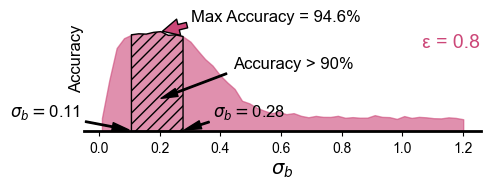

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib.font_manager import FontProperties

# Define fonts
font1 = FontProperties()
font1.set_family('Arial')
font1.set_size(10)

font2 = FontProperties()
font2.set_family('Arial')
font2.set_size(12)

font3 = FontProperties()
font3.set_family('Arial')
font3.set_size(14)

font4 = FontProperties()
font4.set_family('Arial')
font4.set_size(14)

# Independent variables

# Load accuracy data and scale
accuracy = np.squeeze(np.asarray(acc)) * 100

# Create DataFrame
eps_sigma_accuracy = [[sigma, eps, acc] for sigma, acc in zip(sigma_basis_vector, accuracy)]
df = pd.DataFrame(eps_sigma_accuracy, columns=['sigma_basis', 'epsilon', 'accuracy'])

# Set up the color palette
pal = sns.color_palette(palette='plasma', n_colors=1)

# Plot using FacetGrid
g = sns.FacetGrid(df, col='epsilon', hue='epsilon', aspect=2.5, height=2, palette=pal, sharex=True, despine=False)

# Function to highlight the region with accuracy > 90%, rotate arrows for min/max, and annotate values
def fill_under_curve_with_rotated_arrows(x, y, color, **kwargs):
    ax = plt.gca()
    x = np.array(x)
    y = np.array(y)
    
    # Fill the area under the curve
    ax.fill_between(x, y, color=color, alpha=0.6)
    
    # Identify the range where accuracy > 90%
    above_threshold = y >= 90
    if any(above_threshold):
        a = x[np.argmax(above_threshold)]
        b = x[len(x) - np.argmax(above_threshold[::-1]) - 1]
        
        # Highlight the area with a rectangle filled with oriented lines
        ax.fill_between(x, 0, y, where=(x >= a) & (x <= b), facecolor='none', hatch='///', edgecolor='black')

        # Add rotated arrows to indicate min and max sigma_b where accuracy > 90%
        ax.annotate(r'$\sigma_{b} = $' + f'{a:.2f}', xy=(a, 1), xytext=(a - 0.4, 15),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
                    fontproperties=font2, color='black')

        ax.annotate(r'$\sigma_{b} = $' + f'{b:.2f}', xy=(b, 1), xytext=(b + 0.1, 15),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
                    fontproperties=font2, color='black')
        
        # Add an arrow to indicate that in the added area Accuracy > 90%
        ax.annotate('Accuracy > 90%', 
                    xy=((a + b) / 2, 30), 
                    xytext=((a + b) / 2 + 0.25, 60), 
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), 
                    fontproperties=font2)
    
    # Find and annotate the maximum accuracy
    max_acc = np.max(y)
    max_idx = np.argmax(y)
    max_sigma = x[max_idx]
    ax.annotate(f'Max Accuracy = {max_acc:.1f}%', 
                xy=(max_sigma, max_acc), 
                xytext=(max_sigma + 0.1, max_acc + 10),
                arrowprops=dict(facecolor=color, shrink=0.05), fontproperties=font2)

# Use the modified function with the epsilon value
g.map(fill_under_curve_with_rotated_arrows, 'sigma_basis', 'accuracy')

# Customize the appearance of the x-axis and the plots
for ax in g.axes.flat:
    color = pal[0]
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)
    
    plt.setp(ax.get_xticklabels(), fontproperties=font1, color='black')
    ax.set_xlabel(r'$\sigma_{b}$', fontproperties=font3, color='black')

    ax.text(0.85, 0.8, f'ε = {eps:.1f}', transform=ax.transAxes,
            fontproperties=font4, color=color)
    
    # Add y-axis label
    ax.set_ylabel('Accuracy', fontproperties=font2)
    ax.yaxis.set_label_coords(0, 0.7) 

# Adjust the subplots to overlap slightly
g.fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Set y-axis limits and ticks
for ax in g.axes.flat:
    ax.set_ylim(0, 100)
    ax.set_yticks([]) 
    ax.set_title('')

plt.tight_layout()
plt.show()
